## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
import urllib.request
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocesamiento y Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Modelos de Machine Learning
import xgboost as xgb
# Manejo de archivos para Kaggle
import os
# Importar la librería necesaria
from sklearn.preprocessing import OneHotEncoder
import optuna
from sklearn.model_selection import cross_val_score
import lightgbm as lgb


c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train_csv = r"C:/Users/anton/SUBIR_EJERCICIOS_THEBRIDGE/EJERCICIOS_THEBRIDGE/ModeloKAGGLEAUTENTIC/data/train.csv"

df_train = pd.read_csv(train_csv)

#Verificamos
print("Train se ha cargado correctamente:",df_train.shape)

Train se ha cargado correctamente: (912, 13)


## Exploración de los datos

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [4]:
df_train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [5]:
df_train.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
911,229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [6]:
df_train.describe()

,laptop_ID,Inches,Price_in_euros
count,912.000000,912.000000,912.000000
mean,650.312500,14.981579,1111.724090
std,382.727748,1.436719,687.959172
min,2.000000,10.100000,174.000000
25%,324.750000,14.000000,589.000000
50%,636.500000,15.600000,978.000000
75%,982.250000,15.600000,1483.942500
max,1320.000000,18.400000,6099.000000


## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [7]:
def preprocess_data(df):
    df = df.copy()

    # Verificar si Ram es string antes de hacer str.replace()
    if df["Ram"].dtype == "O":  # "O" significa "Object", o sea, texto
        df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)

    if df["Weight"].dtype == "O":
        df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)

    # Extraer características avanzadas de CPU antes de eliminar la columna "Cpu"
    if "Cpu" in df.columns:
        df["Cpu_Brand"] = df["Cpu"].apply(lambda x: x.split()[0] if isinstance(x, str) else "Unknown")  
        df["Cpu_Type"] = df["Cpu"].apply(lambda x: x.split()[2] if isinstance(x, str) and len(x.split()) > 2 else "Other")  
        df["Cpu_Speed"] = df["Cpu"].apply(lambda x: float(x.split()[-1][:-3]) if isinstance(x, str) and "GHz" in x else None)

    # Extraer características avanzadas de GPU antes de eliminar la columna "Gpu"
    if "Gpu" in df.columns:
        df["Gpu_Brand"] = df["Gpu"].apply(lambda x: x.split()[0] if isinstance(x, str) else "Unknown")
        df["Gpu_Type"] = df["Gpu"].apply(lambda x: "Integrated" if "Intel" in x else "Dedicated")

    # Extraer información de la memoria (SSD, HDD, Flash Storage) antes de eliminar "Memory"
    def extract_storage(mem_str, keyword):
        if isinstance(mem_str, str):
            return 1 if keyword in mem_str else 0
        return 0

    if "Memory" in df.columns:
        df["SSD"] = df["Memory"].apply(lambda x: extract_storage(x, "SSD"))
        df["HDD"] = df["Memory"].apply(lambda x: extract_storage(x, "HDD"))
        df["Flash_Storage"] = df["Memory"].apply(lambda x: extract_storage(x, "Flash"))

    # Extraer resolución de pantalla antes de eliminar "ScreenResolution"
    if "ScreenResolution" in df.columns:
        df[["Screen_Width", "Screen_Height"]] = df["ScreenResolution"].str.extract(r'(\d+)x(\d+)').astype(float)
        df["TotalPixels"] = df["Screen_Width"] * df["Screen_Height"]
        df["PPI"] = df["TotalPixels"] / (df["Inches"] ** 2)  # Densidad de píxeles
        df.drop(columns=["ScreenResolution"], inplace=True)

    # Variable combinada de RAM y almacenamiento
    df["Ram_to_Storage"] = df["Ram"] / (df["SSD"] + df["HDD"] + df["Flash_Storage"] + 1)  # Evita división por 0
    df["Processing_Power"] = df["Cpu_Speed"] * df["Ram"]  # Poder computacional

    # Codificación de OpSys
    def categorize_os(os):
        if isinstance(os, str):
            if "windows" in os.lower():
                return "Windows"
            elif "mac" in os.lower():
                return "Mac"
            elif "linux" in os.lower():
                return "Linux"
        return "Other"

    df["OpSys"] = df["OpSys"].apply(categorize_os)

    # Ahora sí, eliminar columnas irrelevantes
    df.drop(columns=["Product", "Cpu", "Gpu", "Memory"], inplace=True, errors="ignore")

    return df

# Aplicar preprocesamiento
df_train = preprocess_data(df_train )

# Confirmar que las columnas existen después del preprocesamiento
print("Columnas después del preprocesamiento:", df_train .columns)

# Guardar el dataset procesado
df_train .to_csv("df_train_processed.csv", index=False)

Columnas después del preprocesamiento: Index(['laptop_ID', 'Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
       'Price_in_euros', 'Cpu_Brand', 'Cpu_Type', 'Cpu_Speed', 'Gpu_Brand',
       'Gpu_Type', 'SSD', 'HDD', 'Flash_Storage', 'Screen_Width',
       'Screen_Height', 'TotalPixels', 'PPI', 'Ram_to_Storage',
       'Processing_Power'],
      dtype='object')


In [8]:

# Definir y transformar características categóricas
categorical_features = ["Company", "TypeName", "OpSys", "Cpu_Brand", "Cpu_Type", "Gpu_Brand", "Gpu_Type"]
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_train = pd.DataFrame(encoder.fit_transform(df_train[categorical_features]),
                            columns=encoder.get_feature_names_out(categorical_features),
                            index=df_train.index)

# Reemplazar columnas categóricas en df_train
df_train = df_train.drop(columns=categorical_features).join(encoded_train)

# Confirmar que df_train ahora es totalmente numérico
print("Nuevas columnas después de One Hot Encoding:", df_train.columns)


Nuevas columnas después de One Hot Encoding: Index(['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_in_euros', 'Cpu_Speed',
       'SSD', 'HDD', 'Flash_Storage', 'Screen_Width', 'Screen_Height',
       'TotalPixels', 'PPI', 'Ram_to_Storage', 'Processing_Power',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Linux', 'OpSys_Mac', 'OpSys_Other', 'OpSys_Windows',
       'Cpu_Brand_AMD', 'Cpu_Brand_Intel', 'Cpu_Type_1600', 'Cpu_Type_1700',
       'Cpu_Type_6110', 'Cpu_Type_7110', 'Cpu_Type_7310', 'Cpu_Type_7410',
      

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [9]:
# Definir X (features) e y (target)
X = df_train.drop(columns=["Price_in_euros", "laptop_ID"])  # Eliminamos el target y el ID
y = df_train["Price_in_euros"]

# Verificar dimensiones
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (912, 82)
Shape de y: (912,)


In [10]:
X.shape

(912, 82)

In [11]:
y.shape

(912,)

### 2. Dividir X_train, X_test, y_train, y_test

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Definir variable objetivo
target = "Price_in_euros"

# Separar características (X) y variable objetivo (y)
X = df_train.drop(columns=[target])
y = df_train[target]

# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar tamaños
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (729, 83)
X_test: (183, 83)
y_train: (729,)
y_test: (183,)


In [13]:
y_train

25     2899.00
84     1249.26
10     1958.90
342    1030.99
890    1396.00
        ...   
106     389.00
270     549.00
860    1859.00
435     306.00
102    1943.00
Name: Price_in_euros, Length: 729, dtype: float64

In [14]:
X_train

,laptop_ID,Inches,Ram,Weight,Cpu_Speed,SSD,HDD,Flash_Storage,Screen_Width,Screen_Height,...,Cpu_Type_i5,Cpu_Type_i7,Cpu_Type_x5-Z8300,Cpu_Type_x5-Z8350,Cpu_Type_x5-Z8550,Gpu_Brand_AMD,Gpu_Brand_Intel,Gpu_Brand_Nvidia,Gpu_Type_Dedicated,Gpu_Type_Integrated
25,1118,17.3,8,3.00,2.6,0,1,0,1920.0,1080.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
84,153,15.6,16,2.56,2.8,1,0,0,1920.0,1080.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10,275,13.3,8,1.37,2.9,1,0,0,2560.0,1600.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
342,1100,14.0,4,1.54,2.3,0,1,0,1920.0,1080.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
890,131,17.3,16,2.80,1.8,1,1,0,1920.0,1080.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,578,14.0,8,1.94,1.6,0,1,0,1366.0,768.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
270,996,15.6,6,2.20,3.6,1,0,0,1920.0,1080.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
860,770,12.5,16,1.18,2.8,1,0,0,1920.0,1080.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
435,407,15.6,4,2.20,1.1,0,1,0,1366.0,768.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Verificar qué columnas categóricas aún existen después de OneHotEncoding
categorical_columns = [col for col in ["Company", "TypeName", "OpSys", "Cpu_Brand", "Cpu_Type", "Gpu_Brand"] if col in X_train.columns]

# Aplicar Label Encoding solo a las columnas categóricas
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Aplicar la misma transformación en X_test
    label_encoders[col] = le  # Guardar el encoder por si se necesita en el futuro

# Verificar que ahora X_train es completamente numérico
print("✅ Label Encoding aplicado correctamente. X_train es numérico:", X_train.dtypes.unique())


✅ Label Encoding aplicado correctamente. X_train es numérico: [dtype('int64') dtype('float64')]


### 3. Baseline de modelos


In [16]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Función objetivo para Optuna
def objective_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
    }
    
    model = xgb.XGBRegressor(**params, random_state=42, n_jobs=-1, objective="reg:squarederror")
    score = cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error").mean()
    
    return -score  # Optuna minimiza, por eso negamos el score

# Ejecutar Optuna
study_xgb = optuna.create_study(direction="minimize")
study_xgb.optimize(objective_xgb, n_trials=50)  # Aumentamos los trials para mejor optimización

# Ver mejores hiperparámetros
print("Mejores parámetros para XGBoost:", study_xgb.best_params)

[I 2025-02-18 15:54:14,071] A new study created in memory with name: no-name-788b972f-16e3-4261-ac5c-cad5def70c9f
[I 2025-02-18 15:54:15,654] Trial 0 finished with value: 309.40065049601253 and parameters: {'n_estimators': 750, 'learning_rate': 0.010727346583832674, 'max_depth': 3, 'min_child_weight': 9, 'subsample': 0.8155754619073389, 'colsample_bytree': 0.8247060886090551, 'gamma': 1.5828594281778563, 'reg_alpha': 4.956480880101796, 'reg_lambda': 5.264606544590187}. Best is trial 0 with value: 309.40065049601253.
[I 2025-02-18 15:54:16,713] Trial 1 finished with value: 292.4743965394206 and parameters: {'n_estimators': 250, 'learning_rate': 0.014678931436185814, 'max_depth': 8, 'min_child_weight': 4, 'subsample': 0.8238358638512289, 'colsample_bytree': 0.7028274818988092, 'gamma': 0.45949089453937775, 'reg_alpha': 2.257405709855891, 'reg_lambda': 3.468952163053025}. Best is trial 1 with value: 292.4743965394206.
[I 2025-02-18 15:54:18,577] Trial 2 finished with value: 296.2886816509

Mejores parámetros para XGBoost: {'n_estimators': 900, 'learning_rate': 0.012164164763334194, 'max_depth': 15, 'min_child_weight': 6, 'subsample': 0.9464941045499978, 'colsample_bytree': 0.5892672925917392, 'gamma': 1.7208007578079572, 'reg_alpha': 2.8096606823489365, 'reg_lambda': 8.59715833304661}


In [17]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Obtener los mejores hiperparámetros encontrados por Optuna
best_params_xgb = study_xgb.best_params

# Entrenar XGBoost con los mejores parámetros
xgb_model = xgb.XGBRegressor(**best_params_xgb, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de test
xgb_pred = xgb_model.predict(X_test)

# Evaluar el modelo con RMSE corregido
xgb_rmse = mean_squared_error(y_test, xgb_pred) ** 0.5  # Tomamos la raíz cuadrada
print(f"RMSE de XGBoost en test: {xgb_rmse:.3f}")

RMSE de XGBoost en test: 335.427


In [18]:
# Definir la función objetivo para Optuna
def objective_lgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1500, step=50),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "num_leaves": trial.suggest_int("num_leaves", 20, 500, step=10),
        "min_child_samples": trial.suggest_int("min_child_samples", 2, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
        "min_split_gain": trial.suggest_float("min_split_gain", 0.0, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "verbosity": -1  # Silencia los mensajes
    }

    model = lgb.LGBMRegressor(**params, random_state=42, n_jobs=-1)
    
    # Validación cruzada para estabilidad en la métrica
    score = -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1).mean()
    
    return score

# Ejecutar Optuna para encontrar los mejores hiperparámetros
study_lgb = optuna.create_study(direction="minimize")
study_lgb.optimize(objective_lgb, n_trials=200)  # Aumentamos el número de pruebas para mejor optimización

# Obtener los mejores hiperparámetros
best_params_lgb = study_lgb.best_params
print(f"Mejores parámetros para LightGBM: {best_params_lgb}")

[I 2025-02-18 15:56:58,888] A new study created in memory with name: no-name-69d09602-2314-45ef-bf9c-7ff792e4c034
[I 2025-02-18 15:57:01,950] Trial 0 finished with value: 319.6613805169803 and parameters: {'n_estimators': 750, 'learning_rate': 0.01584525435100388, 'max_depth': 8, 'num_leaves': 390, 'min_child_samples': 35, 'subsample': 0.6994841206494409, 'colsample_bytree': 0.72453875559969, 'reg_alpha': 0.3822210970494766, 'reg_lambda': 6.804947878221671, 'min_split_gain': 0.924614626574572, 'bagging_freq': 8, 'feature_fraction': 0.7318447951663571}. Best is trial 0 with value: 319.6613805169803.
[I 2025-02-18 15:57:06,515] Trial 1 finished with value: 274.2654585025924 and parameters: {'n_estimators': 1050, 'learning_rate': 0.009272164526695941, 'max_depth': 8, 'num_leaves': 180, 'min_child_samples': 3, 'subsample': 0.6367761566952681, 'colsample_bytree': 0.5715482350916017, 'reg_alpha': 6.428603614925922, 'reg_lambda': 3.884431413678884, 'min_split_gain': 0.6914260462989547, 'baggi

Mejores parámetros para LightGBM: {'n_estimators': 1400, 'learning_rate': 0.006835995082848726, 'max_depth': 10, 'num_leaves': 50, 'min_child_samples': 2, 'subsample': 0.6865527963806001, 'colsample_bytree': 0.9624118630626872, 'reg_alpha': 8.461928862420562, 'reg_lambda': 3.3318722409805055, 'min_split_gain': 0.017154846299305748, 'bagging_freq': 10, 'feature_fraction': 0.4022779697817176}


In [19]:
# Obtener los mejores 10 trials
top_trials = sorted(study_lgb.trials, key=lambda x: x.value)[:10]

# Extraer los parámetros de los mejores trials
params_df = pd.DataFrame([trial.params for trial in top_trials])

# Calcular la media de cada hiperparámetro
best_avg_params = params_df.mean().to_dict()

# Convertir algunos valores que no deben ser flotantes
best_avg_params["n_estimators"] = int(best_avg_params["n_estimators"])
best_avg_params["max_depth"] = int(best_avg_params["max_depth"])
best_avg_params["num_leaves"] = int(best_avg_params["num_leaves"])
best_avg_params["min_child_samples"] = int(best_avg_params["min_child_samples"])
best_avg_params["bagging_freq"] = int(best_avg_params["bagging_freq"])

print(f"Parámetros promedio de los mejores 10 trials: {best_avg_params}")

Parámetros promedio de los mejores 10 trials: {'n_estimators': 1380, 'learning_rate': 0.007311356920583924, 'max_depth': 10, 'num_leaves': 52, 'min_child_samples': 2, 'subsample': 0.6666528537520895, 'colsample_bytree': 0.9423597213285178, 'reg_alpha': 8.020299883193328, 'reg_lambda': 3.7335972371344255, 'min_split_gain': 0.30304490075713314, 'bagging_freq': 9, 'feature_fraction': 0.43204557225800466}


In [20]:
from lightgbm import early_stopping, log_evaluation

# Reentrenar el modelo con los mejores parámetros promediados
final_lgb = lgb.LGBMRegressor(**best_avg_params, random_state=42, n_jobs=-1)

# Entrenamiento con callbacks para early stopping
final_lgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[early_stopping(stopping_rounds=50, verbose=True), log_evaluation(10)]
)

# Predecir en test
y_pred_final = final_lgb.predict(X_test)

# Calcular RMSE en test
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f"RMSE Final con LightGBM optimizado: {final_rmse}")

[LightGBM] [Warning] feature_fraction is set=0.43204557225800466, colsample_bytree=0.9423597213285178 will be ignored. Current value: feature_fraction=0.43204557225800466
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.43204557225800466, colsample_bytree=0.9423597213285178 will be ignored. Current value: feature_fraction=0.43204557225800466
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 729, number of used features: 60
[LightGBM] [

In [21]:
lgb_model = lgb.LGBMRegressor(**best_avg_params, random_state=42, n_jobs=-1)

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
)


[LightGBM] [Warning] feature_fraction is set=0.43204557225800466, colsample_bytree=0.9423597213285178 will be ignored. Current value: feature_fraction=0.43204557225800466
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.43204557225800466, colsample_bytree=0.9423597213285178 will be ignored. Current value: feature_fraction=0.43204557225800466
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 729, number of used features: 60
[LightGBM] [

LGBMRegressor(bagging_freq=9, colsample_bytree=0.9423597213285178,
              feature_fraction=0.43204557225800466,
              learning_rate=0.007311356920583924, max_depth=10,
              min_child_samples=2, min_split_gain=0.30304490075713314,
              n_estimators=1380, n_jobs=-1, num_leaves=52, random_state=42,
              reg_alpha=8.020299883193328, reg_lambda=3.7335972371344255,
              subsample=0.6666528537520895)

In [22]:
# Hacer predicciones con los modelos individuales
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)

# Calcular RMSE de cada modelo en test (sin squared=False)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

# Evitar problemas dividiendo por RMSE muy pequeños
epsilon = 1e-6  # Pequeño valor para evitar divisiones por 0
w_xgb = 1 / (rmse_xgb + epsilon)
w_lgb = 1 / (rmse_lgb + epsilon)

# Normalizar pesos usando softmax para mayor estabilidad
w_xgb, w_lgb = np.exp([w_xgb, w_lgb]) / np.sum(np.exp([w_xgb, w_lgb]))

# Nueva predicción final usando los pesos ajustados
y_pred_weighted = (w_xgb * y_pred_xgb) + (w_lgb * y_pred_lgb)

# Calcular RMSE final (sin squared=False)
rmse_weighted = np.sqrt(mean_squared_error(y_test, y_pred_weighted))
print(f"🔥 RMSE de Stacking con Pesos Softmax: {rmse_weighted:.3f}")


[LightGBM] [Warning] feature_fraction is set=0.43204557225800466, colsample_bytree=0.9423597213285178 will be ignored. Current value: feature_fraction=0.43204557225800466
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
🔥 RMSE de Stacking con Pesos Softmax: 332.457


In [23]:
from sklearn.linear_model import Ridge

# 📌 Fusionar predicciones de ambos modelos en una matriz de características para el meta-modelo
stacked_features = np.column_stack((y_pred_xgb, y_pred_final))

# 📌 Entrenar un modelo Ridge como meta-modelo para mejorar la combinación de predicciones
meta_model = Ridge(alpha=0.5)  # Se redujo alpha para evitar sobreajuste
meta_model.fit(stacked_features, y_test)

# 📌 Generar nuevas predicciones con el modelo de stacking
stacked_predictions = meta_model.predict(stacked_features)

# 📌 Calcular la métrica de error RMSE para evaluar la mejora del stacking
stacked_rmse = np.sqrt(mean_squared_error(y_test, stacked_predictions))
print(f"✅ RMSE Final del Stacking Mejorado (XGBoost + LightGBM): {stacked_rmse:.3f}")

✅ RMSE Final del Stacking Mejorado (XGBoost + LightGBM): 332.246


### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

📉 RMSE del modelo optimizado (Random Forest): 332.457
      Actual    Predicted
649  1099.00  1266.532451
761   959.00  1091.704037
545   857.07  1105.664824
367   699.00   874.588310
361   369.00   352.438397


C:\Users\anton\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


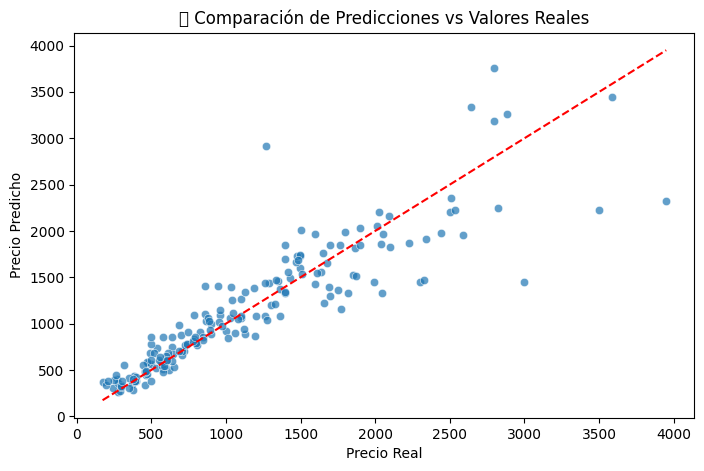

In [24]:
# Importar librerías necesarias
from math import sqrt

# 🔹 Calcular y mostrar RMSE del modelo
rmse = sqrt(mean_squared_error(y_test, y_pred_weighted))
print(f"📉 RMSE del modelo optimizado (Random Forest): {rmse:.3f}")

# 🔹 Comparación de predicciones vs valores reales
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_weighted})
print(comparison_df.head())  # Ver primeras predicciones

# 🔹 Visualizar la relación entre valores reales y predichos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_weighted, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("📊 Comparación de Predicciones vs Valores Reales")
plt.show()

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [25]:
X_pred = pd.read_csv("C:/Users/anton/SUBIR_EJERCICIOS_THEBRIDGE/EJERCICIOS_THEBRIDGE/ModeloKAGGLEAUTENTIC/data/test.csv")
X_pred.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
2,1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
3,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
4,1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [26]:
X_pred.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
386,820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
387,948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
388,483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
389,1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
390,421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [27]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    object 
 2   Product           391 non-null    object 
 3   TypeName          391 non-null    object 
 4   Inches            391 non-null    float64
 5   ScreenResolution  391 non-null    object 
 6   Cpu               391 non-null    object 
 7   Ram               391 non-null    object 
 8   Memory            391 non-null    object 
 9   Gpu               391 non-null    object 
 10  OpSys             391 non-null    object 
 11  Weight            391 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 36.8+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [28]:
# Aplicar el mismo preprocesamiento que en train_df
X_pred = preprocess_data(X_pred)

# Aplicar OneHotEncoder con el mismo encoder entrenado en train_df
encoded_test = pd.DataFrame(encoder.transform(X_pred[categorical_features]))
encoded_test.columns = encoder.get_feature_names_out(categorical_features)
encoded_test.index = X_pred.index

# Concatenar con X_pred y eliminar las variables categóricas originales
X_pred = pd.concat([X_pred.drop(columns=categorical_features), encoded_test], axis=1)

# Confirmar que las columnas coinciden con train_df
print("Columnas finales de X_pred:", X_pred.columns)

Columnas finales de X_pred: Index(['laptop_ID', 'Inches', 'Ram', 'Weight', 'Cpu_Speed', 'SSD', 'HDD',
       'Flash_Storage', 'Screen_Width', 'Screen_Height', 'TotalPixels', 'PPI',
       'Ram_to_Storage', 'Processing_Power', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Linux', 'OpSys_Mac', 'OpSys_Other', 'OpSys_Windows',
       'Cpu_Brand_AMD', 'Cpu_Brand_Intel', 'Cpu_Type_1600', 'Cpu_Type_1700',
       'Cpu_Type_6110', 'Cpu_Type_7110', 'Cpu_Type_7310', 'Cpu_Type_7410',
       'Cpu_Type_9000e', 'Cpu_Type_9220',

In [29]:
X_pred_processed = X_pred.drop(columns=["laptop_ID"])

In [30]:
# Asegurar que las columnas de test coincidan con las de train
X_pred_final = X_pred.drop(columns=["laptop_ID"], errors="ignore")

# Verificar diferencias en columnas
train_cols = set(X_train.columns)
pred_cols = set(X_pred_final.columns)

print("Columnas en X_train pero no en X_pred_final:", train_cols - pred_cols)
print("Columnas en X_pred_final pero no en X_train:", pred_cols - train_cols)

# Si faltan columnas en X_pred_final, las agregamos con valores 0
for col in train_cols - pred_cols:
    X_pred_final[col] = 0

# Si hay columnas de más en X_pred_final, las eliminamos
X_pred_final = X_pred_final[X_train.columns]

# Hacer predicción con Stacking (XGBoost + LightGBM)
predictions_submit = (xgb_model.predict(X_pred_final) * 0.5) + (lgb_model.predict(X_pred_final) * 0.5)

# Crear submission
submission = pd.DataFrame({
    "laptop_ID": X_pred["laptop_ID"],  # Usamos X_pred, que ya lo tenemos
    "Price_euros": predictions_submit
})

# Guardar submission
submission.to_csv("submission.csv", index=False)
print("Archivo submission.csv guardado correctamente.")

submission.to_csv("submission.csv", index=False)

Columnas en X_train pero no en X_pred_final: {'laptop_ID'}
Columnas en X_pred_final pero no en X_train: set()
[LightGBM] [Warning] feature_fraction is set=0.43204557225800466, colsample_bytree=0.9423597213285178 will be ignored. Current value: feature_fraction=0.43204557225800466
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
Archivo submission.csv guardado correctamente.


True
238.43556460192 4246.113290062747
174.0 6099.0


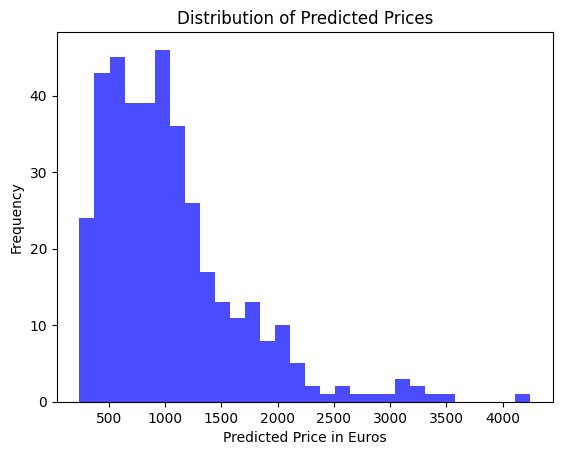

In [31]:
# Comprobaciones finales
print(len(predictions_submit) == X_pred_processed.shape[0])

# ¿Tienen sentido en comparación con el target del train dataset?
print(predictions_submit.min(), predictions_submit.max())
print(df_train["Price_in_euros"].min(),df_train["Price_in_euros"].max())

# Nos ayudamos de un histograma
plt.hist(predictions_submit, bins=30, alpha=0.7, color='blue')
plt.xlabel("Predicted Price in Euros")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Prices")
plt.show()


**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [32]:
# ¿Qué opináis?
# ¿Sí, no?

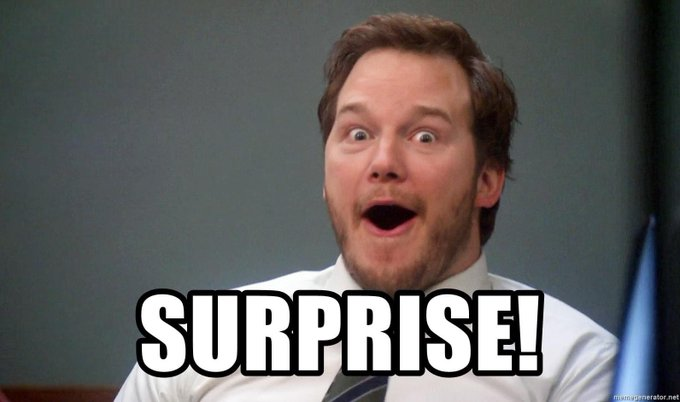

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [33]:
sample = pd.read_csv("C:/Users/anton/SUBIR_EJERCICIOS_THEBRIDGE/EJERCICIOS_THEBRIDGE/ModeloKAGGLEAUTENTIC/data/sample_submission.csv")


In [34]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [35]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [36]:
# Crear DataFrame de submission usando assign() para mayor claridad
submission = X_pred[["laptop_ID"]].assign(Price_in_euros=predictions_submit)

# Verificar las primeras filas para asegurar la estructura correcta
submission.head()


,laptop_ID,Price_in_euros
0,209,1403.004595
1,1281,277.211414
2,1168,337.013610
3,1231,848.537435
4,1020,763.457000


In [37]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [38]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [39]:
chequeador(submission)

You're ready to submit!
